# Table of Contents
 <p><div class="lev1 toc-item"><a href="#1D-spectra" data-toc-modified-id="1D-spectra-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1D spectra</a></div><div class="lev2 toc-item"><a href="#exponential-growth-model" data-toc-modified-id="exponential-growth-model-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>exponential growth model</a></div><div class="lev2 toc-item"><a href="#two-epoch-model" data-toc-modified-id="two-epoch-model-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>two epoch model</a></div><div class="lev2 toc-item"><a href="#bottleneck-with-exponential-growth-model" data-toc-modified-id="bottleneck-with-exponential-growth-model-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>bottleneck with exponential growth model</a></div><div class="lev2 toc-item"><a href="#three-epoch-model" data-toc-modified-id="three-epoch-model-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>three epoch model</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></div><div class="lev1 toc-item"><a href="#2D-spectra" data-toc-modified-id="2D-spectra-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2D spectra</a></div><div class="lev2 toc-item"><a href="#simple-divergence-model" data-toc-modified-id="simple-divergence-model-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>simple divergence model</a></div><div class="lev3 toc-item"><a href="#Interpretation" data-toc-modified-id="Interpretation-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Interpretation</a></div><div class="lev2 toc-item"><a href="#divergence-with-migration" data-toc-modified-id="divergence-with-migration-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>divergence with migration</a></div><div class="lev3 toc-item"><a href="#Interpretation" data-toc-modified-id="Interpretation-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Interpretation</a></div><div class="lev2 toc-item"><a href="#Influence-of-the-degree-of-correction" data-toc-modified-id="Influence-of-the-degree-of-correction-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Influence of the degree of correction</a></div><div class="lev2 toc-item"><a href="#divergence-with-asymmetric-migration" data-toc-modified-id="divergence-with-asymmetric-migration-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>divergence with asymmetric migration</a></div><div class="lev3 toc-item"><a href="#Interpretation" data-toc-modified-id="Interpretation-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Interpretation</a></div><div class="lev2 toc-item"><a href="#Exponential-size-change" data-toc-modified-id="Exponential-size-change-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Exponential size change</a></div><div class="lev2 toc-item"><a href="#Linear-size-change" data-toc-modified-id="Linear-size-change-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Linear size change</a></div><div class="lev2 toc-item"><a href="#Ancient-migration" data-toc-modified-id="Ancient-migration-27"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Ancient migration</a></div><div class="lev3 toc-item"><a href="#Interpretation" data-toc-modified-id="Interpretation-271"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Interpretation</a></div><div class="lev2 toc-item"><a href="#recent-restart-of-gene-flow" data-toc-modified-id="recent-restart-of-gene-flow-28"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>recent restart of gene flow</a></div><div class="lev1 toc-item"><a href="#ancestral-population-size-change" data-toc-modified-id="ancestral-population-size-change-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ancestral population size change</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></div>

Here I am going to summarise, compare and interpret the results of the dadi analysis of spectra modified with Ludovic's correction (see [02_modified_2D_models](02_modified_2D_models.ipynb) for details). For the implementation of Ludovic's correction see [Ludovics_correction](../Ludovics_correction.ipynb).

In [1]:
import numpy as np

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

error in importing Two Locus modules


In [2]:
from glob import glob
import dill
from utility_functions import *
import pandas as pd
# turn on floating point division by default, old behaviour via '//'
from __future__ import division

In [3]:
%matplotlib inline

import pylab

pylab.rcParams['figure.figsize'] = [12, 10]
pylab.rcParams['font.size'] = 14

# 1D spectra

In [5]:
# load modified spectra, Ludovic's correction applied

fs_ery = dadi.Spectrum.from_file("ERY_modified.sfs")
fs_par = dadi.Spectrum.from_file("PAR_modified.sfs")

In [10]:
# get standard neutral model spectra

# make the extrapolating version of the standard neutral model function
func_ex = dadi.Numerics.make_extrap_log_func(dadi.Demographics1D.snm)

# setting the smallest grid size slightly larger than the largest population sample size
pts_l = [40, 50, 60]

ns = fs_ery.sample_sizes

# calculate unfolded AFS under standard neutral model (up to a scaling factor theta)
snm = func_ex(0, ns, pts_l)
snm = snm.fold()

# scaled snm spectrum for ERY
snm_ery = dadi.Inference.optimally_scaled_sfs(snm, fs_ery)

# scaled snm spectrum for PAR
snm_par = dadi.Inference.optimally_scaled_sfs(snm, fs_par)

In [13]:
snm_ery - snm_par

Spectrum([-- -15.784563244740639 -8.130252378916339 -5.586293220548669
 -4.321878582355566 -3.569955408153419 -3.0748523765969367
 -2.7270560084593853 -2.4718764627366454 -2.2790023270642905
 -2.1303242045294155 -2.014402169029154 -1.923703092341384
 -1.8531174166569144 -1.7991156808357118 -1.7592478027395373
 -1.7318383466545129 -1.7157996305306824 -0.8552596470958633 -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

The scaling of the neutral model spectrum towards the ery or par spectrum is almost identical.

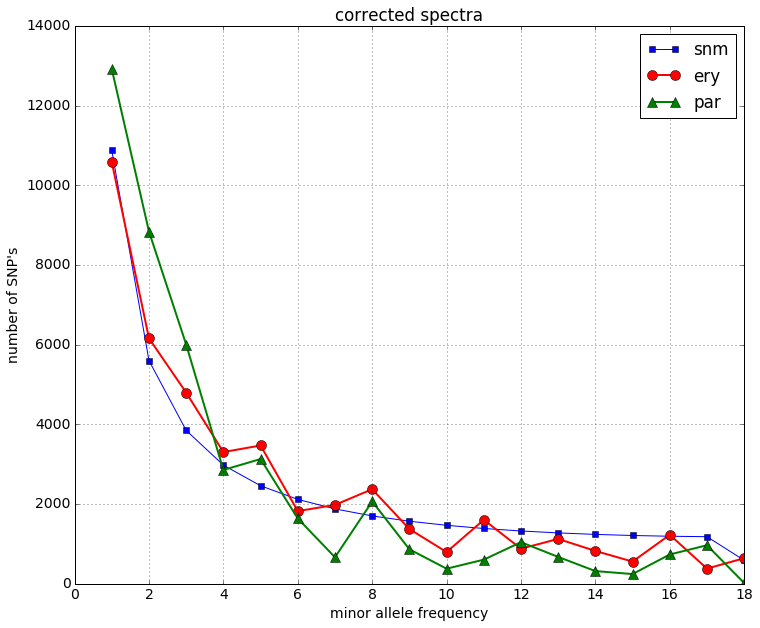

In [16]:
pylab.plot(snm_ery, 'bs-', label="snm")
pylab.plot(fs_ery, 'ro-', label="ery", linewidth=2.0, markersize=10)
pylab.plot(fs_par, 'g^-', label="par", linewidth=2.0, markersize=10)

pylab.grid()
pylab.legend()
pylab.xlabel("minor allele frequency")
pylab.ylabel("number of SNP's")
pylab.title("corrected spectra")

The PAR spectrum was corrected with a $p$ of 0.36 and the ERY spectrum with a $p$ of 0.34, the optimal values of $p$ for each spectrum.

## exponential growth model

For ERY as well as for PAR the time parameter is hitting the upper parameter boundary (8) with the corrected spectrum. With uncorrected spectrum, optimisation was successful for ERY but not for PAR, because of lack of convergence.

## two epoch model

The two epoch model could not be fit to the ERY nor the PAR spectrum with Ludovic's correction applied due hitting of upper boundary on the time parameter (8). A 2-epoch model could also not be fit to the ERY nor PAR with the uncorrected spectra due to hitting the lower and upper boundary on the time parameter, respectively.

## bottleneck with exponential growth model

With the uncorrected spectra, the optimal parameter values for ERY suggested an ancient population size of >21 million, which is unrealistic. For PAR the optimisation did not converge.

With the corrected spectra, the optimal parameter values imply an effective population size of >14 million for erythropus (before decline). I think such a high effective population size is unrealistic. The fitting to the corrected spectrum of PAR even estimated an initial increase to 36 million. Such high effective population sizes are obviously unrealistic. I must therefore regard the fitting of this model to the corrected spectra as failed.

## three epoch model

With the corrected spectrum for ERY, this model unambiguously (i. e. in all optimisation runs) infers a long time with around 10-fold increased population size followed by a stepwise decrease to almost the size of the ancient population. The inference from the uncorrected spectrum ranged from a 186-fold increase to a reduction to 1/3 of the ancient population size.

Similar to the ERY spectrum, the inference from the corrected PAR spectrum showed a consistent population size increase (ranging from 38-fold to a ridiculous 7772-fold). This was followed by a very recent radical reduction in population size to only a fraction of the ancient size.

## Conclusion

So, except for the consistent inference of an ancient population size increase (stronger in parallelus), the inference from corrected spectra is qualitatively quite similar and not more conclusive than the inference from the uncorrected spectra.

# 2D spectra

In [17]:
# load spectrum modified with Ludovic's correction, p=35

sfs2d = dadi.Spectrum.from_file("EryPar_modified.2dsfs")

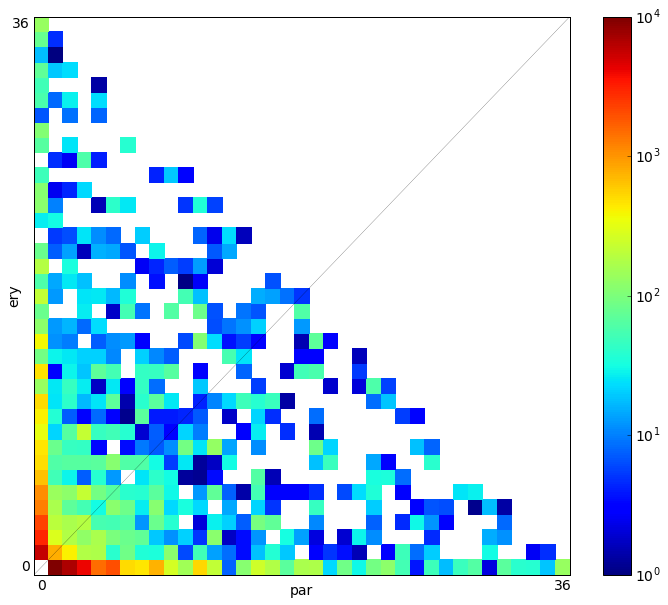

In [18]:
dadi.Plotting.plot_single_2d_sfs(sfs2d, vmin=1, cmap=pylab.cm.jet)

The 2D SFS was corrected with a $p$ of 0.35, the optimal $p$ when fit to simple divergence in isolation model with parameters $\nu_1=1$, $\nu_2=1$ and $T=1$.

In [19]:
# number of SNP's in the spectrum
sfs2d.S()

60573.584426000001

In [27]:
ns = sfs2d.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]

## simple divergence model

In [21]:
def split_nomig(params, ns, pts):
    """
    params = (nu1,nu2,T)
    ns = (n1,n2)

    Split into two populations of specifed size, no migration.

    nu1: Size ratio of population 1 after split (with respect to ancestral population size Na)
    nu2: Size ratio of population 2 after split (with respect to ancestral population size Na)
    T: Time in the past of split (in units of 2*Na generations) 
    n1,n2: Sample sizes of resulting Spectrum
    pts: Number of grid points to use in integration.
    """
    nu1,nu2,T = params

    xx = dadi.Numerics.default_grid(pts)

    phi = dadi.PhiManip.phi_1D(xx)
    phi = dadi.PhiManip.phi_1D_to_2D(xx, phi)

    phi = dadi.Integration.two_pops(phi, xx, T, nu1, nu2, m12=0, m21=0)

    fs = dadi.Spectrum.from_phi(phi, ns, (xx,xx))
    return fs

In [23]:
ar_split_nomig = []

for filename in glob("OUT_2D_models/split_nomig_[!p]*dill"):
    ar_split_nomig.append(dill.load(open(filename)))

In [24]:
returned = [flatten(out)[:7] for out in ar_split_nomig]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0','nu2_0', 'T_0', 'nu1_opt', 'nu2_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nu1_0,nu2_0,T_0,nu1_opt,nu2_opt,T_opt,-logL
2,0.130396,0.685058,0.060110,0.762412,1.526605,0.301939,15791.588420
0,0.153522,0.215024,0.125826,0.760217,1.528322,0.302361,15791.696999
6,0.225985,0.490219,0.061947,0.760194,1.528215,0.302337,15791.697000
4,0.571756,1.202900,0.071081,0.760168,1.528309,0.302349,15791.697001
3,0.245443,0.148331,0.352726,0.760211,1.528331,0.302349,15791.697001
9,0.160553,0.551626,0.183081,0.760241,1.528333,0.302361,15791.697002
7,1.407268,0.202361,0.026992,0.760152,1.528101,0.302327,15791.697029
1,0.764874,1.141367,0.114088,0.760070,1.528050,0.302322,15791.697101
8,1.352339,0.270908,0.036199,0.760387,1.528244,0.302390,15791.697213
5,1.227281,0.734266,0.039261,0.767487,1.537413,0.303948,15791.771200


This is how convergence looks like.

### Interpretation

In [28]:
# get best-fit parameter combination
popt = np.array(df.sort_values(by='-logL', ascending=True).iloc[0, 3:6])

# create extrapolating version of the model function
func_ex = dadi.Numerics.make_extrap_log_func(split_nomig)

# get unscaled, best-fit model spectrum
model = func_ex(popt, ns, pts_l)

# get logL of best-fit model
ll_model = dadi.Inference.ll_multinom(model, sfs2d)

# get theta
theta = dadi.Inference.optimal_sfs_scaling(model, sfs2d)

# get total sequence length in spectrum
L = sfs2d.data.sum()

# get theta per site
print "The optimal value of theta per site for the ancestral population is {0:.4f}.".format(theta/L)

The optimal value of theta per site for the ancestral population is 0.0076.


In [29]:
mu = 3e-9 # assumed per generation per site mutation rate

# get ancestral population size
N_ref = theta/L/mu/4

print "The effective size of the ancestral population of ERY and PAR (in number of diploid individuals) implied by this theta is:\n {0:,}.".format(int(N_ref))

The effective size of the ancestral population of ERY and PAR (in number of diploid individuals) implied by this theta is:
 631,166.


In [32]:
print "The ancestral population of ERY and PAR split apart {0:,} generations ago.".format(int(popt[2]*2*N_ref)),
print "Since then until present the ERY population had a constant size of {0:,} and the PAR population of {1:,}.".format(int(popt[0]*N_ref), int(popt[1]*N_ref))

The ancestral population of ERY and PAR split apart 381,147 generations ago. Since then until present the ERY population had a constant size of 481,209 and the PAR population of 963,542.


The following table compares the best-fit parameter values from the uncorrected and corrected spectrum:

| parameter | uncorrected | corrected |
| :-------: | ----------- | --------- |
| $N_a$     |  688,875    | 631,166   |
| $\nu_1$   |  438,776    | 481,209   |
| $\nu_2$   |  847,045    | 963,542   |
| T         |  400,188    | 381,147   |
| -logL     |  20387      | 15791     |

The values are translated to absolute units, i. e. $\nu_x$ in _individuals_ and T in _generations_.

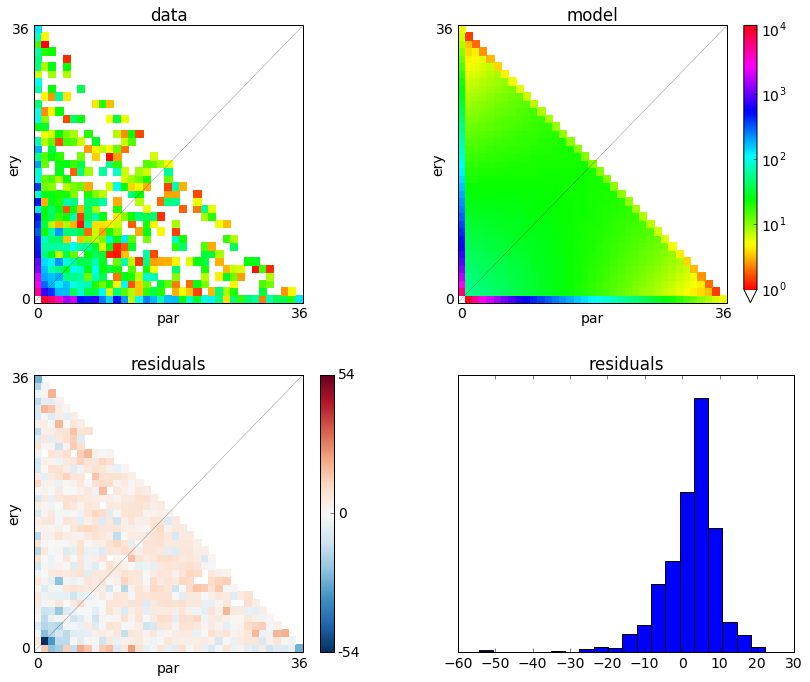

In [33]:
dadi.Plotting.plot_2d_comp_multinom(model, sfs2d, vmin=1)

The best-fit model spectrum predicts far fewer SNP's with frequency [1,1] than the observed (corrected) spectrum.

## divergence with migration

This model adds symmetrical migration.

In [36]:
ar_split_mig = []

for filename in glob("OUT_2D_models/split_mig_[0-9]*dill"):
    ar_split_mig.append(dill.load(open(filename)))

In [37]:
# get all optimisations
returned = [flatten(out)[:9] for out in ar_split_mig]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0','nu2_0', 'T_0', 'm_0', 'nu1_opt', 'nu2_opt', 'T_opt', 'm_opt', '-logL'])

df.sort_values(by='-logL', ascending=True).head(10)

,nu1_0,nu2_0,T_0,m_0,nu1_opt,nu2_opt,T_opt,m_opt,-logL
12,0.410126,0.976289,1.980000,0.138307,1.584756,2.862212,1.726329,0.210858,12809.710148
6,1.037985,3.751629,1.980000,0.057275,1.587910,2.867287,1.730633,0.210333,12809.711143
9,0.792582,1.502558,0.457088,0.205240,1.589701,2.870222,1.735177,0.210359,12809.715071
8,1.883348,2.585737,0.476910,0.070592,1.589471,2.871227,1.734395,0.210454,12809.719004
7,3.120532,2.216834,0.878223,0.336300,1.588236,2.871408,1.734567,0.210433,12809.720773
3,5.342499,1.206116,1.609641,0.126021,1.574618,2.844696,1.705099,0.211724,12809.729668
16,0.381319,7.766225,1.980000,0.658405,1.589798,2.869340,1.732618,0.210669,12809.734974
13,0.730603,6.809501,1.301306,0.416379,1.571368,2.838305,1.701136,0.212217,12809.738733
15,0.614214,1.217983,0.220814,0.192430,1.572018,2.838641,1.703611,0.211194,12809.910434
14,0.412119,5.644039,1.980000,0.080137,1.525121,2.763772,1.619169,0.216784,12810.362825


This is very good convergence.

### Interpretation

In [38]:
func_ex = dadi.Numerics.make_extrap_log_func(dadi.Demographics2D.split_mig)

popt = np.array(df.sort_values(by='-logL', ascending=True).iloc[0, 4:8])

# get unscaled, best-fit model spectrum
model = func_ex(popt, ns, pts_l)

# get theta
theta = dadi.Inference.optimal_sfs_scaling(model, sfs2d)

# get total sequence length in spectrum
L = sfs2d.data.sum()

# get theta per site
print "The optimal value of theta per site for the ancestral population is {0:.4f}.".format(theta/L)

The optimal value of theta per site for the ancestral population is 0.0037.


In [39]:
mu = 3e-9 # assumed per generation per site mutation rate
N_ref = theta/L/mu/4
print "The effective size of the ancestral population of ery and par (in number of diploid individuals) implied by this theta is:\n {0:,}.".format(int(N_ref))

The effective size of the ancestral population of ery and par (in number of diploid individuals) implied by this theta is:
 308,029.


In [40]:
nu1, nu2, T, m = popt

In [41]:
print "The ancestral population split apart {0:,} generation ago.".format(int(T*2*N_ref)), 
print "Since then, ERY and PAR had a constant population size of {0:,} and {1:,}, respectively.".format(int(popt[0]*N_ref), int(popt[1]*N_ref)), 
print "Since the split, a fraction of {0:.2e} of the population size of ERY were made up each generation of new immigrant individuals from PAR".format(m/2/N_ref/nu1),
print "and a fraction of {0:.2e} of the population size of PAR were made up each generation of new immigtant individuals of ERY.".format(m/2/N_ref/nu2)
print "Put another way:",
print "Since the split ERY received a constant number of {0:.2f} new immigrant alleles per generation, while PAR received a constant number of {1:.2f} per generation.".format(m*nu1, m*nu2)

The ancestral population split apart 1,063,520 generation ago. Since then, ERY and PAR had a constant population size of 488,151 and 881,645, respectively. Since the split, a fraction of 2.16e-07 of the population size of ERY were made up each generation of new immigrant individuals from PAR and a fraction of 1.20e-07 of the population size of PAR were made up each generation of new immigtant individuals of ERY.
Put another way: Since the split ERY received a constant number of 0.33 new immigrant alleles per generation, while PAR received a constant number of 0.60 per generation.


The following table compares the parameter estimates for the _split-migration_ model derived with the uncorrected and the corrected spectrum in their absolute units:

| parameter      | uncorrected | corrected   |
| :-------:      | ----------- | ---------   |
| $N_a$          |  468,295    |  308,029    |
| $N_{ERY}$      |  465,572    |  488,151    |
| $N_{PAR}$      |  827,069    |  881,645    |
| T (gen.)       |  864,128    |  1,063,520  |
| $p_{par->ery}$ |  2.69e-07   |  2.16e-07   | 
| $p_{ery->par}$ |  1.52e-07   |  1.20e-07   |
| -logL          |  18574      |  12809      |

$N_x$ have unit *individuals*, T has unit *generations*, $p_x$ are _proportions of new immigrant alleles per generation_.

There is a marked difference in the inferred ancestral population size ($N_a$ eq. to $N_{ref}$), which affects all other parameters. The estimated contemporary population sizes for ERY and PAR are slightly higher for the corrected spectrum, but not much so. The inferred divergence time is 1/4 higher with the corrected spectrum. The inferred migration rates (as proportion of new immigrant individuals per generation) are both slightly smaller with the corrected spectrum, but not dramatically.

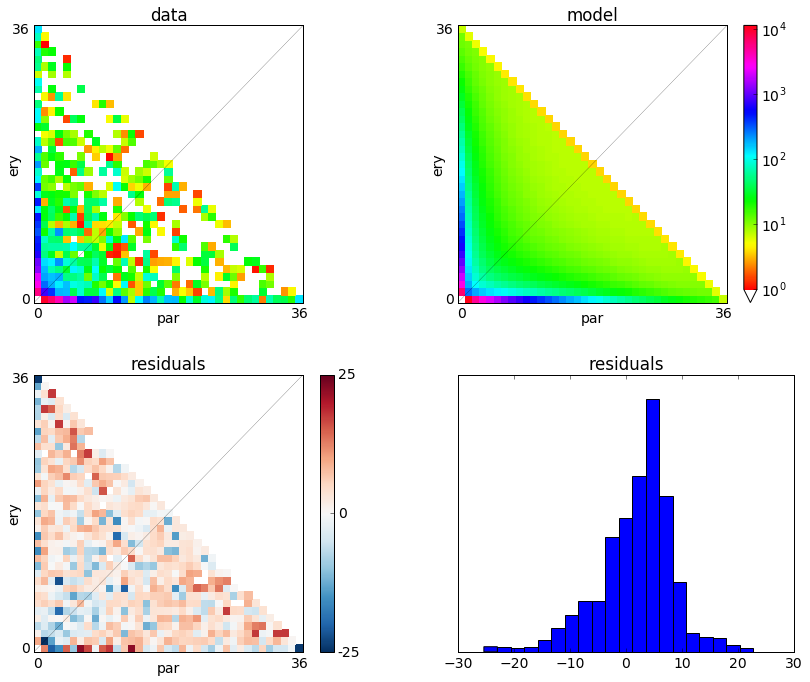

In [43]:
dadi.Plotting.plot_2d_comp_multinom(data=sfs2d, model=model, vmin=1)

The difference in the frequency class [1,1] between the observed (corrected) and model spectrum has dramatically decreased after introducing migration. The introduction of migration has improved the log likelihood of the model by 2982 units. So there is a strong signal of gene flow in the 2D spectrum.

## Influence of the degree of correction

I have also fit the above two models to spectra corrected with p=0.30 and p=0.39, both derived by using a slightly different null model for the optimisation of p, that is with $T=2$ and $T=0.5$ respectively (see [notebook](../Ludovics_correction.ipynb)).

Since the _degree_ of correction does not seem to have a strong influence on parameter estimation (see [notebook](02_modified_2D_models)), I am going to use only the spectrum corrected with $p=0.35$ in the following.

## divergence with asymmetric migration

In [45]:
def split_asym_mig(params, ns, pts):
    """
    params = (nu1,nu2,T,m1,m2)
    ns = (n1,n2)

    Split into two populations of specifed size, with potentially asymmetric migration.

    nu1: population size ratio of population 1 after split (with respect to Na)
    nu2: population size ratio of population 2 after split (with respect to Na) 
    T: Time in the past of split (in units of 2*Na generations) 
    m1: Migration rate from ery into par (in units of 2*Na ind per generation)
    m2: Migration rate from par into ery (in units of 2*Na ind per generation)
    n1,n2: Sample sizes of resulting Spectrum
    pts: Number of grid points to use in integration.
    """
    nu1,nu2,T,m1,m2 = params

    xx = dadi.Numerics.default_grid(pts)

    phi = dadi.PhiManip.phi_1D(xx)
    
    # split
    phi = dadi.PhiManip.phi_1D_to_2D(xx, phi) 
    
    # divergence with potentially asymmetric migration
    phi = dadi.Integration.two_pops(phi, xx, T, nu1, nu2, m12=m2, m21=m1)

    fs = dadi.Spectrum.from_phi(phi, ns, (xx,xx))
    return fs

In [46]:
ar_split_asym_mig = []

for filename in glob("OUT_2D_models/split_asym_mig_[0-9]*dill"):
    ar_split_asym_mig.append(dill.load(open(filename)))

In [47]:
l = 2*5+1

returned = [flatten(out)[:l] for out in ar_split_asym_mig]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0','nu2_0', 'T_0', 'm1_0', 'm2_0', 'nu1_opt', 'nu2_opt', 'T_opt', 'm1_opt', 'm2_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nu1_0,nu2_0,T_0,m1_0,m2_0,nu1_opt,nu2_opt,T_opt,m1_opt,m2_opt,-logL
2,0.828753,1.252881,3.960000,0.103805,0.563144,1.555405,3.812884,2.343805,0.076152,0.347306,12359.631637
5,2.550436,1.024807,0.662181,0.058917,0.072694,1.534739,3.751096,2.292298,0.077597,0.350747,12359.664337
8,0.424053,1.138974,0.718766,0.222591,0.153777,1.529845,3.758155,2.285943,0.076150,0.352598,12359.684317
7,1.514872,0.848603,1.635625,0.516468,0.282811,1.575057,3.857334,2.388837,0.076225,0.342434,12359.735720
6,3.127599,4.277118,2.725190,0.263502,0.161697,1.693936,4.157804,2.677514,0.070230,0.320827,12360.799448
3,0.816507,1.993877,3.960000,0.267442,0.067155,1.605256,4.027444,2.526903,0.067682,0.341928,12361.932695
9,0.858891,1.667468,0.856949,0.066816,0.068287,1.526397,3.759222,2.351502,0.076778,0.344442,12364.139460
1,3.993936,1.066110,2.039748,0.097478,0.482028,1.614288,3.967013,2.585679,0.059440,0.337259,12382.911919
4,0.953722,4.464633,1.731286,0.360577,0.187640,0.945295,2.572276,1.192388,0.082591,0.561914,12473.567122
0,5.909949,2.213097,0.624062,0.140236,0.079440,0.970340,2.713070,1.103459,0.023247,0.596518,12633.931484


This looks like convergence. Allowing for asymmetric migration rates improves the model fit by 450 logL units and is therefore highly significant.

### Interpretation

In [48]:
popt = np.array(df.sort_values(by='-logL', ascending=True).iloc[0, 5:10])

func_ex = dadi.Numerics.make_extrap_log_func(split_asym_mig)

# calculate best-fit model spectrum
model = func_ex(popt, ns, pts_l)

theta = dadi.Inference.optimal_sfs_scaling(model, sfs2d)
L = sfs2d.data.sum()
print "The optimal value of theta per site for the ancestral population is {0:.5f}.".format(theta/L)

The optimal value of theta per site for the ancestral population is 0.00307.


In [50]:
mu = 3e-9
N_ref = theta/L/mu/4
print "The effective size of the ancestral population of ERY and PAR (in number of diploid individuals) implied by this theta is:\n {0:,}.".format(int(N_ref))

The effective size of the ancestral population of ERY and PAR (in number of diploid individuals) implied by this theta is:
 255,715.


In [51]:
nu1, nu2, T, m1, m2 = popt

In [52]:
print "The ancestral population split apart {0:,} generations ago.".format(int(T*2*N_ref)),
print "Immediately after the split the ERY population changed to a size of {0:,} and the PAR population to {1:,}.".format(int(nu1*N_ref), int(nu2*N_ref)),
print "Since the split of the ancestral population, PAR received 1 individual from ERY every {0:.2f} generations,".format(1.0/(m1/2*nu2)),
print "while ERY received 1 PAR individual every {0:.2f} generations.".format(1.0/(m2/2*nu1)),
print "Put another way: The PAR population contained a constant proportion of {0:.2e} of new immigrant alleles each generation".format(m1/2/N_ref/nu2),
print "and the ERY population contained a constant proportion of {0:.2e} of new immigrant alleles each generation.".format(m2/2/N_ref/nu1)

The ancestral population split apart 1,198,692 generations ago. Immediately after the split the ERY population changed to a size of 397,740 and the PAR population to 975,012. Since the split of the ancestral population, PAR received 1 individual from ERY every 6.89 generations, while ERY received 1 PAR individual every 3.70 generations. Put another way: The PAR population contained a constant proportion of 3.91e-08 of new immigrant alleles each generation and the ERY population contained a constant proportion of 4.37e-07 of new immigrant alleles each generation.


The following table compares the inferred parameters for the _asymmetric migration_ model from the uncorrected and corrected spectrum in their absolute units:

| parameter      | uncorrected | corrected |
| :----------:   | ----------- | --------- |
| $N_{a}$        | 410,678     | 255,715   |
| $N_{ery}$      | 378,198     | 397,740   |
| $N_{par}$      | 919,352     | 975,012   |
| T              | 1,022,329   | 1,198,692 |
| $p_{ery->par}$ | 4.58e-08    | 3.91e-08  |
| $p_{par->ery}$ | 6.54e-07    | 4.37e-07  |
| -logL          | 18104       | 12359     |

$N_x$ have unit *individuals*, T has unit *generations*, $p_x$ are _proportions of new immigrant alleles per generation_.

There is marked difference in the inferred size of the ancestral population between corrected and uncorrected spectra. The inferred time of the split in number of generations for the unmodified spectrum was 1,022,329. Not a dramatic difference from the one inferred with this corrected spectrum, but still 176,000 years difference.

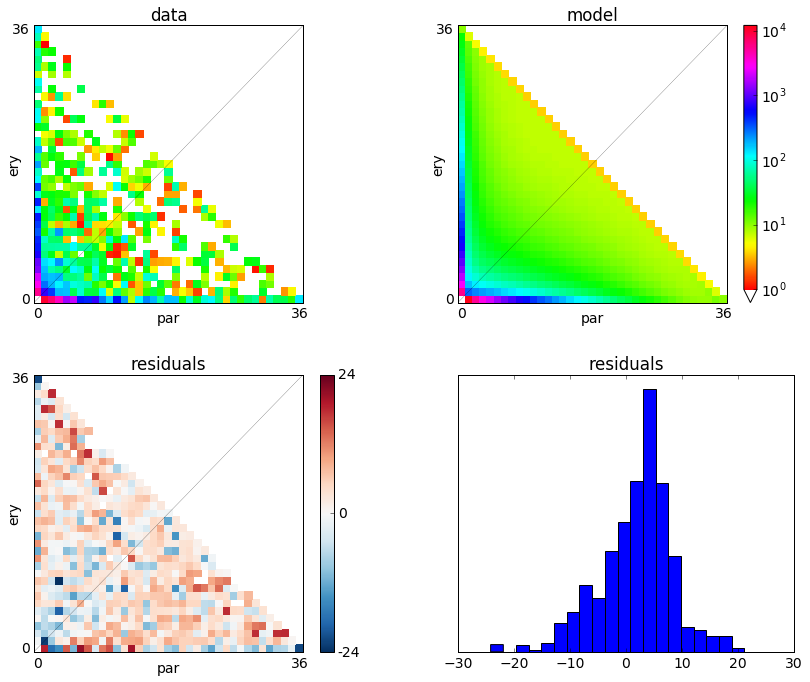

In [53]:
dadi.Plotting.plot_2d_comp_multinom(data=sfs2d, model=model, vmin=1)

Note the asymmetry in the model spectrum for frequency classes [1, x] and [x, 1].

## Exponential size change

So far, the split coincided with a stepwise population size change. This model adds a proportion $s$ of the ancestral population size that is allocated to each daughter population after the split and exponential population size change afterwards.

None of the parameter combinations has higher likelihood (12888.96) than the best-fit parameter combinations of the previous model (lowest neg. logL 12,359). Also the three best-fit parameter combinations are very close to the upper limit of parameter bound that I set for the time parameter $T$ and the population size ratio for PAR implies a current effective population size of several millions (something I think is unlikely given the disperal rate and the patchiness of the habitat of _Chorthippus parallelus_). 

## Linear size change

This model changes the population size growth or decline from exponential to linear.

There is no good convergence, the inferred $s$ is very high (close to 1 or 0) and the inferred T is close to the upper boundary that I set. Furthermore, the best *-logL* (12516.95) is still higher than the best *-logL* achieved with the _asymmetric migration_ model (12,359).

## Ancient migration

In [54]:
def split_asym_mig_iso(params, ns, pts):
    """
    params = (nu1,nu2,Tc,m1,m2,Ti)
    ns = (n1,n2)

    Split into two populations of specifed size, with potentially asymmetric migration
    for a time Tc followed by complete isolation until present.

    nu1: population size ratio of population 1 after split (with respect to Na)
    nu2: population size ratio of population 2 after split (with respect to Na)
    Tc: Time of gene flow after split (in units of 2*Na generations) 
    m1: Migration rate from ery into par (in units of 2*Na ind per generation)
    m2: Migration rate from par into ery (in units of 2*Na ind per generation)
    Ti: Time of isolation after cessation of gene flow
    The split lies Tc+Ti * 2Na generations in the past.
    n1,n2: Sample sizes of resulting Spectrum
    pts: Number of grid points to use in integration.
    """
    nu1,nu2,Tc,m1,m2,Ti = params

    xx = dadi.Numerics.default_grid(pts)

    phi = dadi.PhiManip.phi_1D(xx)
    
    # split
    phi = dadi.PhiManip.phi_1D_to_2D(xx, phi) 
    
    # divergence with potentially asymmetric migration
    phi = dadi.Integration.two_pops(phi, xx, Tc, nu1, nu2, m12=m2, m21=m1)
    
    # divergence without gene flow
    phi = dadi.Integration.two_pops(phi, xx, Ti, nu1, nu2, m12=0, m21=0)

    fs = dadi.Spectrum.from_phi(phi, ns, (xx,xx))
    return fs

In [56]:
ar_split_asym_mig_iso = []

for filename in glob("OUT_2D_models/split_asym_mig_iso*dill"):
    ar_split_asym_mig_iso.append(dill.load(open(filename)))

In [58]:
l = 2*6+1

success = [flatten(out)[:l] for out in ar_split_asym_mig_iso]

df = pd.DataFrame(data=success, \
                  columns=['nu1_0','nu2_0', 'Tc_0', 'm1_0', 'm2_0', 'Ti_0', 'nu1_opt', 'nu2_opt', 'Tc_opt', 'm1_opt', 'm2_opt', 'Ti_opt', '-logL'])

df.sort_values(by='-logL', ascending=True).head(10)

,nu1_0,nu2_0,Tc_0,m1_0,m2_0,Ti_0,nu1_opt,nu2_opt,Tc_opt,m1_opt,m2_opt,Ti_opt,-logL
31,3.421903,12.882920,7.920000,0.090910,0.137533,0.104192,3.428735,8.372007,6.719565,0.040627,0.202323,0.118790,12156.061309
29,2.208113,8.325249,5.594802,0.045599,0.494681,0.058458,3.434782,8.387801,6.732856,0.040569,0.202054,0.119088,12156.061960
17,1.638405,7.027064,3.328377,0.093406,0.279576,0.084667,3.365763,8.218499,6.573684,0.041489,0.206208,0.116898,12156.066451
4,3.157867,11.894738,6.832827,0.089239,0.343652,0.125056,3.151832,7.672115,6.074031,0.044790,0.217833,0.107115,12156.250139
2,2.150693,3.752285,7.339520,0.053352,0.182956,0.054508,2.905080,7.099776,5.511164,0.047722,0.237869,0.100633,12156.336374
8,4.507973,4.211151,4.530473,0.038619,0.356819,0.049796,2.838367,6.936326,5.355545,0.048636,0.243390,0.096733,12156.361180
19,3.495075,4.606451,5.940000,0.055664,0.246368,0.105244,2.769359,6.770118,5.196347,0.049832,0.249131,0.094203,12156.467656
16,1.899722,10.672562,4.209415,0.035018,0.158627,0.129019,2.549936,6.237224,4.683557,0.053493,0.269833,0.085552,12156.997320
15,3.193392,3.398205,7.493464,0.054278,0.184446,0.099955,2.625334,6.426852,4.896773,0.051447,0.259054,0.084092,12157.030051
9,1.114068,2.045370,0.628484,0.054210,0.524956,0.061246,2.877591,7.051026,5.515295,0.046193,0.241364,0.095230,12157.097777


These are the 10 best parameter combinations of an extensive and refined search. There is still quite some variation in the estimated population size for PAR (nu2) and the time of primary contact (Tc). The addition of a recent time of complete isolation (Ti) has improved the fit by 203 log likelihood unit and is therefore highly significant. With the uncorrected spectrum the improvment in fit was 512 log likelihood units, so more than twice as strong.

### Interpretation

In [61]:
popt = np.array(df.sort_values(by='-logL', ascending=True).iloc[0,6:12])

func_ex = dadi.Numerics.make_extrap_log_func(split_asym_mig_iso)

model = func_ex(popt, ns, pts_l)

theta = dadi.Inference.optimal_sfs_scaling(model, sfs2d)
L = sfs2d.data.sum()
print "The optimal value of theta per site for the ancestral population is {0:.5f}.".format(theta/L)

The optimal value of theta per site for the ancestral population is 0.00136.


In [62]:
mu = 3e-9
L = sfs2d.data.sum() # this sums over all entries in the spectrum, including masked ones, i. e. also contains invariable sites

N_ref = theta/L/mu/4

print "The effective size of the ancestral population of ery and par (in number of diploid individuals) implied by this theta is:\n {0:,}.".format(int(N_ref))

The effective size of the ancestral population of ery and par (in number of diploid individuals) implied by this theta is:
 113,708.


This is quite a small effective population size for an insect.

In [63]:
nu1, nu2, Tc, m1, m2, Ti = popt

In [64]:
print "The ancestral population split apart {0:,} generations ago.".format(int((Tc+Ti)*2*N_ref)),
print "Immediately after the split the ERY population changed to a size of {0:,} and the PAR population to {1:,}.".format(int(nu1*N_ref), int(nu2*N_ref)),
print "Since the split of the ancestral population, PAR received 1 individual from ERY every {0:.2f} generations,".format(1.0/(m1/2*nu2)),
print "while ERY received 1 PAR individual every {0:.2f} generations.".format(1.0/(m2/2*nu1)),
print "Put another way: The PAR population contained a constant proportion of {0:.2e} of new immigrant alleles each generation".format(m1/2/N_ref/nu2),
print "and the ERY population contained a constant proportion of {0:.2e} of new immigrant alleles each generation.".format(m2/2/N_ref/nu1),
print "ERY and PAR remained in contact for {0:,} generations.".format(int(Tc*2*N_ref)),
print "{0:,} generations ago gene flow between ERY and PAR had ceased.".format(int(Ti*2*N_ref))

The ancestral population split apart 1,555,161 generations ago. Immediately after the split the ERY population changed to a size of 389,877 and the PAR population to 951,970. Since the split of the ancestral population, PAR received 1 individual from ERY every 5.88 generations, while ERY received 1 PAR individual every 2.88 generations. Put another way: The PAR population contained a constant proportion of 2.13e-08 of new immigrant alleles each generation and the ERY population contained a constant proportion of 2.59e-07 of new immigrant alleles each generation. ERY and PAR remained in contact for 1,528,146 generations. 27,014 generations ago gene flow between ERY and PAR had ceased.


The absolute values of the two time parameters are striking. This model infers a very ancient origin of ERY and PAR and a very recent cessation of gene flow. Obviously, this model is an abstraction of the certainly more complicated history of the two subspecies, as one would expect given that there have been at least three ice ages since the inferred origin of ERY and PAR.

The following table compares the inferred parameters for the _ancient migration_ model from the uncorrected and corrected spectrum in their absolute units:

| parameter      | uncorrected | corrected |
| :----------:   | ----------- | --------- |
| $N_{a}$        | 125,977     | 113,522   |
| $N_{ery}$      | 363,349     | 389,237   |
| $N_{par}$      | 886,821     | 950,409   |
| $T_c$          | 1,748,505   | 1,525,640 |
| $p_{ery->par}$ | 2.21e-08    | 2.14e-08  |
| $p_{par->ery}$ | 3.27e-07    | 2.60e-07  |
| $T_i$          | 43,628      | 26,970    |
| D              | 1044        | 406       |

$N_x$ have unit *individuals*, $T_x$ has unit *generations*, $p_x$ are proportions of new immigrant alleles per generation and D is two times the likelihood ratio between the best fit parameters of this model with the hitherto best performing _asymmetric migration_ model.

Note that with the uncorrected spectrum, I could not achieve satisfactory convergence of parameter estimations. The parameters inferred with the corrected spectrum are therefore more reliable. The inferred population sizes for ERY and PAR aren't very different between corrected and uncorrected spectra and so is the inferred time of contact ($T_c$). The migration rates are slightly reduced with the corrected spectrum and the time since cessation of gene flow ($T_i$) is inferred to be even more recent than with the uncorrected spectrum.

The addition of $T_i$ improves the model by 203 log likelihood units as compared to the model without a period of complete isolation (`split_asym_mig` above). If the better fit is not just due to fitting noise and bias in the data, then this means that the final period of complete isolation is significantly greater than 0. I think the fact that both the raw and the corrected spectrum lead to very similar parameter estimates provides some support for the interpretation that $T_i$ is actually greater than zero and that this is not just due to fitting noise or bias in the data.

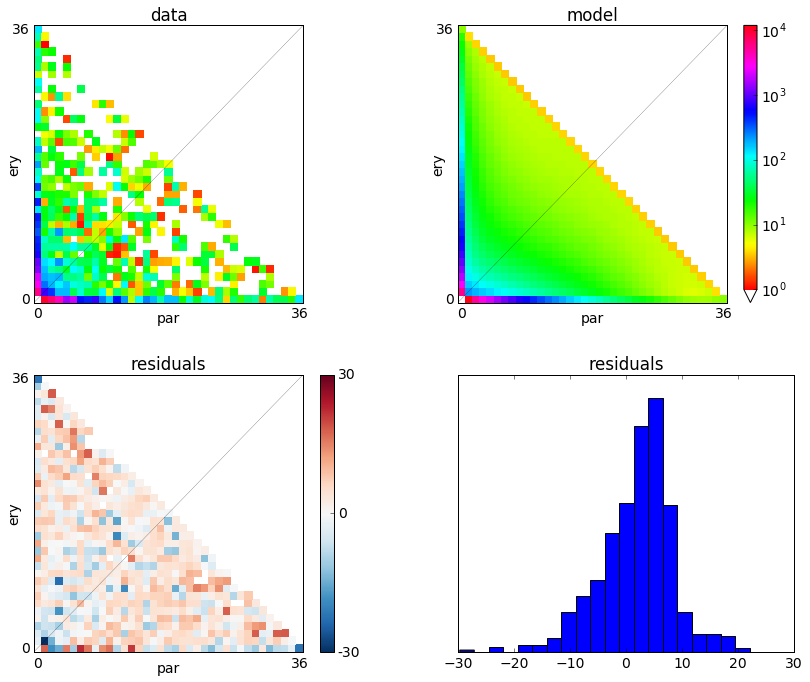

In [67]:
dadi.Plotting.plot_2d_comp_multinom(model=model, data=sfs2d, vmin=1)

## recent restart of gene flow

The two populations are relatively close to the hybrid zone centre at the Col de la Quillane in the Pyrenees. The clines for some characters have been shown to be many kilometers wide. It can therefore be assumed that there is some recent gene flow between the two populations. Can this gene flow be detected from this spectrum?

In [1]:
def split_mig_iso_mig(params, ns, pts):
    """
    params = (nu1,nu2,Tc,m1,m2,Ti,Tsc)
    ns = (n1,n2)

    Split into two populations of specifed size, with potentially asymmetric migration
    for a time Tc followed by a period of complete isolation Ti which is followed by a restart of
    migration until present. Migration rates in the two epochs are assumed to be equal (and constant).

    nu1: Size of population 1 after split.
    nu2: Size of population 2 after split.
    Tc: Time of gene flow after split (in units of 2*Na generations) 
    m1: Migration rate from ery into par (in units of 2*Na ind per generation)
    m2: Migration rate from par into ery (in units of 2*Na ind per generation)
    Ti: Time of isolation after cessation of gene flow
    Tsc: Time of gene flow after period of isolation until present
    
    The split lies Tc+Ti+Tsc * 2Na generations in the past.
    
    n1,n2: Sample sizes of resulting Spectrum
    pts: Number of grid points to use in integration.
    """
    nu1,nu2,Tc,m1,m2,Ti,Tsc = params

    xx = dadi.Numerics.default_grid(pts)

    phi = dadi.PhiManip.phi_1D(xx)
    
    # split
    phi = dadi.PhiManip.phi_1D_to_2D(xx, phi) 
    
    # divergence with potentially asymmetric migration
    phi = dadi.Integration.two_pops(phi, xx, Tc, nu1, nu2, m12=m2, m21=m1)
    
    # divergence without gene flow
    phi = dadi.Integration.two_pops(phi, xx, Ti, nu1, nu2, m12=0, m21=0)
    
    # divergence with potentially asymmetric migration
    phi = dadi.Integration.two_pops(phi, xx, Tsc, nu1, nu2, m12=m2, m21=m1)

    fs = dadi.Spectrum.from_phi(phi, ns, (xx,xx))
    return fs

In [69]:
ar_mig_iso_mig = []

for filename in glob("OUT_2D_models/split_mig_iso_mig*dill"):
    ar_mig_iso_mig.append(dill.load(open(filename)))

In [70]:
l = 2*7+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_mig_iso_mig]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0','nu2_0', 'Tc_0', 'm1_0', 'm2_0', 'Ti_0', 'Tsc_0', 'nu1_opt', 'nu2_opt', 'Tc_opt', 'm1_opt', 'm2_opt', 'Ti_opt', 'Tsc_opt', '-logL'])

df.sort_values(by='-logL', ascending=True).head(10)

,nu1_0,nu2_0,Tc_0,m1_0,m2_0,Ti_0,Tsc_0,nu1_opt,nu2_opt,Tc_opt,m1_opt,m2_opt,Ti_opt,Tsc_opt,-logL
0,3.367161,5.873662,5.181757,0.021243,0.131704,0.134310,0.012568,3.188610,7.794114,6.164844,0.043640,0.218696,0.114964,0.004645,12155.538032
11,4.848455,7.844252,6.532817,0.065627,0.291770,0.149297,0.006102,3.120969,7.612606,6.000069,0.045012,0.222445,0.112705,0.004608,12155.590169
4,3.581468,4.386019,7.920000,0.040211,0.199524,0.090897,0.006340,3.105754,7.584235,5.979666,0.044949,0.224270,0.111817,0.004517,12155.591385
10,2.861802,6.174207,6.206258,0.023059,0.194373,0.107483,0.019635,3.037227,7.420328,5.807496,0.045940,0.228788,0.109332,0.004451,12155.596732
17,2.615168,14.532166,6.177148,0.038351,0.161283,0.116289,0.019920,3.021104,7.379894,5.769061,0.046165,0.229732,0.108768,0.005524,12155.718311
19,4.689580,4.930597,7.920000,0.036797,0.243583,0.130929,0.019558,3.746330,9.107319,7.386824,0.039007,0.187509,0.149092,0.012786,12156.381833
9,2.646968,3.943732,3.992614,0.063371,0.344669,0.221130,0.010017,2.698943,6.615402,5.040117,0.050977,0.258592,0.094888,0.002855,12156.558507
15,5.958216,10.071090,7.920000,0.070913,0.185235,0.168712,0.018208,3.880071,9.474192,7.726884,0.036690,0.181476,0.155206,0.016580,12156.884063
1,2.805249,5.052889,4.014091,0.029912,0.231140,0.202572,0.014063,2.486040,6.086709,4.536669,0.055292,0.278498,0.089498,0.005871,12156.937086
12,8.362353,7.174874,4.318747,0.030505,0.314294,0.029781,0.046488,3.054782,7.596574,5.940901,0.042105,0.238595,0.125940,0.010319,12159.837573


This is good convergence.

The best-fit ancient migration model had a log likelihood of -12156. So only one log likelihood unit worse.

In [72]:
ll_s = 12156.061309
ll_c = 12155.538032
D = 2 * (ll_s - ll_c)
D

1.0465540000004694

In [73]:
# calculate p-value for Chi-square dist.
# the weights specify a weighted sum of chi^2 distributions with 1 and 2 d.o.f
# this is because Tsc is 0 in the split_asym_mig_iso model and at the boundary of the parameter space
p = dadi.Godambe.sum_chi2_ppf(D, weights=(0.5, 0.5))
p

0.15315103430195065

A recent restart of gene flow cannot be detected from this corrected spectrum. I arrived at the same result with the uncorrected spectrum. Although not significant, the inferred Tsc corresponds to 1,135 generations. With the uncorrected spectrum, the inferred Tsc corresponded to 2 generations.

# ancestral population size change

I have a fit a model that adds to the _ancient migration_ model a potential size change in the ancestral population to ERY and PAR.

Refining runs with Nelder-Mead and BFGS algorithms could not achieve good convergence. Quite different demographic scenarios have almost identical likelihood (12,156). The _ancient migration_ model from above had -logL of 12,156 with it's best fit parameter values. A population size change in the ancestral population to ERY and PAR cannot therefore not be inferred from this spectrum.

This _ancestral population size change_ model predicts a very similar demographic history as the _ancient migration_ model.That is it does not predict a very different time of split between ERY and PAR, for instance. That is still estimated to be ~1.5 million years ago. The same is true for the other parameters that overlap with the _ancient migration_ model.

## Conclusion

There is no major difference in the parameter estimates from the corrected and uncorrected spectrum. Apart from a slightly younger but still ancient origin of ERY and PAR of 1,525,640 years, the corrected spectrum infers a more recent cessation of gene flow (26,970 years) than the uncorrected spectrum. There is however better convergence of parameter optimisations with the corrected spectrum, which may indicate that the estimates with the corrected spectrum are more reliable.

![ancient migration](model.png)

The numbers on the right in the upper plot are a bit misleading. It's a 27 (ky ago) and a zero.